In [1]:
import numpy as np
import pandas as pd

In [2]:
f = pd.read_csv("Downloads/Crop_recommendationV2.csv")
f.head()

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671


In [12]:
c=f[['N','P','K','temperature','humidity','ph','rainfall','soil_moisture','label']]

In [13]:
c.describe()

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,20.151388
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,5.793720
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,10.024260
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,15.179949
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,20.088481
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,25.255146
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,29.997860


In [5]:
len(c['label'].unique().tolist())

22

In [14]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   soil_moisture  2200 non-null   float64
 8   label          2200 non-null   object 
dtypes: float64(5), int64(3), object(1)
memory usage: 154.8+ KB


In [15]:
c.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
soil_moisture    0
label            0
dtype: int64

In [8]:
c.duplicated().sum()

0

In [16]:
corr = c.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.030749
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,0.017027
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.008116
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.009842
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.010933
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.023978
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,-0.048593
soil_moisture,-0.030749,0.017027,0.008116,-0.009842,0.010933,-0.023978,-0.048593,1.000000


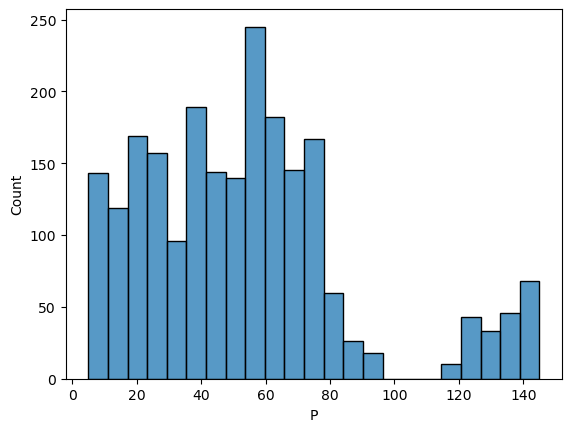

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.distplot(crop['N'])
# sns.distplot(crop['P'])
sns.histplot(c['P'])
plt.show()

<AxesSubplot:>

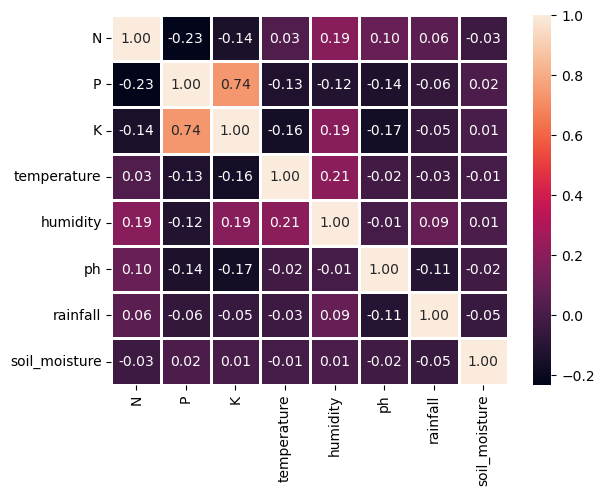

In [18]:
import seaborn as sns
sns.heatmap(corr,fmt = '.2f',
            linewidths = 2,
            annot = True)

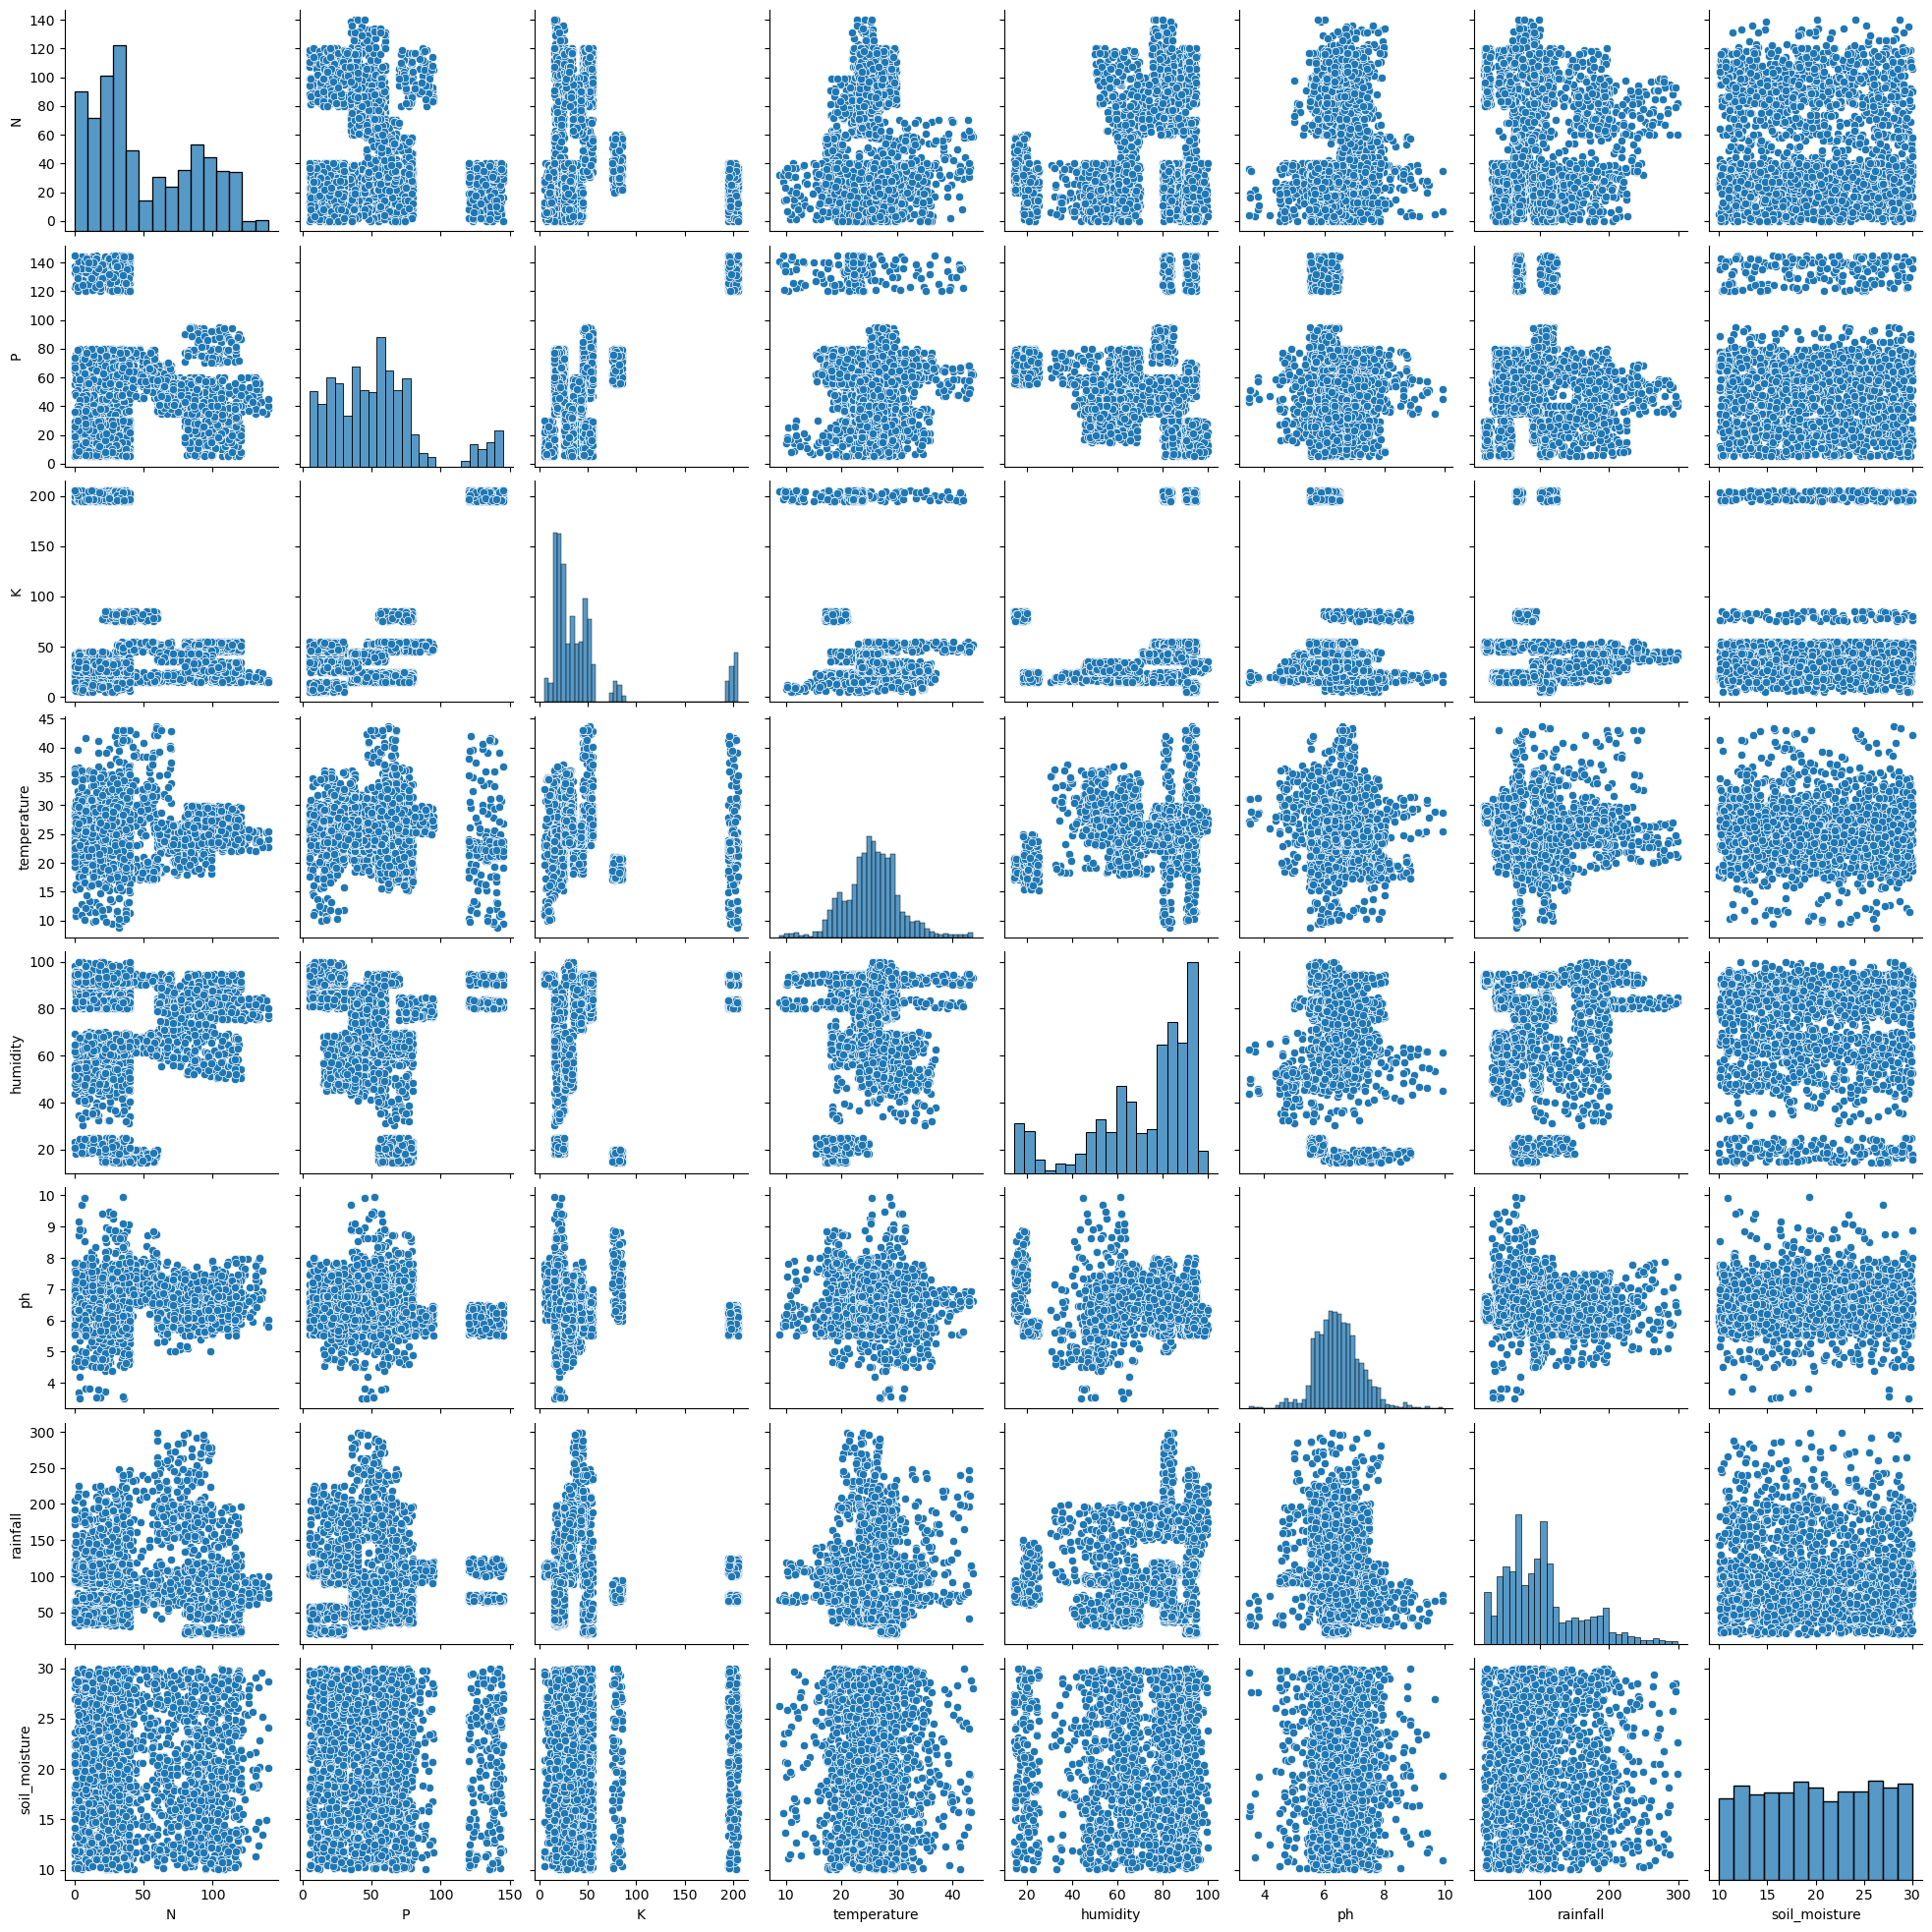

In [19]:
sns.pairplot(data=c,palette='gist_heat_r',diag_kind='hist')

In [20]:
c

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,29.446064,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,12.851183,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,29.363913,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,26.207732,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,28.236236,rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,10.697757,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,12.203830,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,28.989176,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,13.642305,coffee


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
c['crop_num']=le.fit_transform(c['label'])
c['crop_num'].value_counts()

C:\Users\spard\AppData\Local\Temp\ipykernel_17044\2126902712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['crop_num']=le.fit_transform(c['label'])


20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: crop_num, dtype: int64

In [22]:
x = c.drop(['crop_num','label'],axis=1)
y = c['crop_num']

In [23]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N              2200 non-null   int64  
 1   P              2200 non-null   int64  
 2   K              2200 non-null   int64  
 3   temperature    2200 non-null   float64
 4   humidity       2200 non-null   float64
 5   ph             2200 non-null   float64
 6   rainfall       2200 non-null   float64
 7   soil_moisture  2200 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 137.6 KB


In [24]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score

In [30]:
from sklearn.metrics import classification_report,mean_squared_error,mean_absolute_error
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,plot_precision_recall_curve,roc_curve,precision_recall_curve
from sklearn.metrics import confusion_matrix,r2_score
from sklearn.model_selection import cross_val_predict,cross_val_score


In [27]:
lr=LogisticRegression()
sgc=SGDClassifier()
svc=SVC()
etc=ExtraTreeClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knc=KNeighborsClassifier(n_neighbors=3)
xgc=XGBClassifier()
pac=PassiveAggressiveClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
lr.fit(x_train,y_train)
sgc.fit(x_train,y_train)
svc.fit(x_train,y_train)
etc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
knc.fit(x_train,y_train)
xgc.fit(x_train,y_train)
pac.fit(x_train,y_train)
bc.fit(x_train,y_train)
gbc.fit(x_train,y_train)
abc.fit(x_train,y_train)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)


C:\Users\spard\DEMO\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BernoulliNB()

In [31]:
gnb.fit(x_train,y_train)
print(gnb.score(x_test,y_test),
      precision_score(y_test,gnb.predict(x_test),average='macro'),
      recall_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3),average='macro'),
      f1_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3),average='macro'),
        r2_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3)))


0.9954545454545455 0.9963636363636365 0.9948692177433623 0.9948555589121544 0.9850952568819782


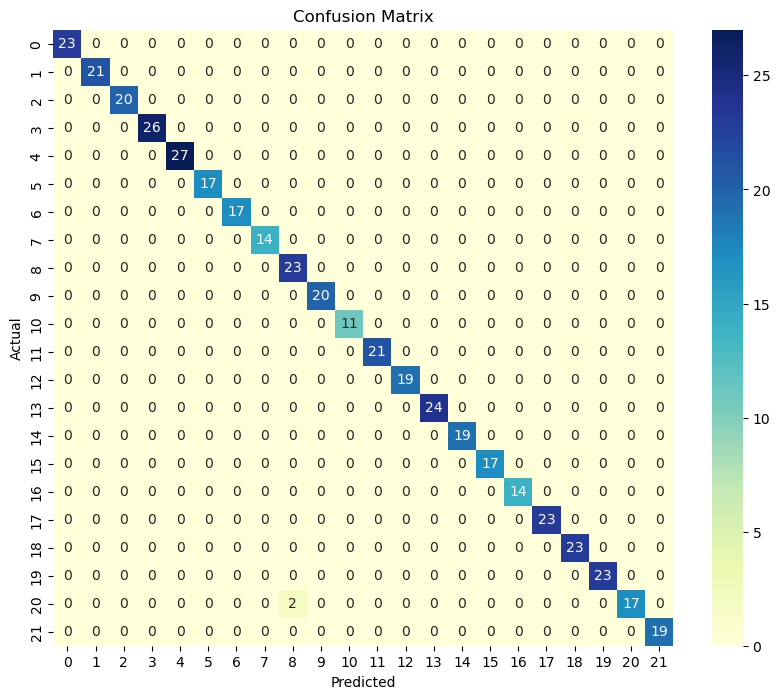

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, gnb.predict(x_test))
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb.predict(x_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [31]:
a=[
    gnb.score(x_test,y_test),
   mnb.score(x_test,y_test),
   bnb.score(x_test,y_test),
   dtc.score(x_test,y_test),
   svc.score(x_test,y_test),
   etc.score(x_test,y_test),
   lr.score(x_test,y_test),
   sgc.score(x_test,y_test),
   pac.score(x_test,y_test),
   rfc.score(x_test,y_test),
   knc.score(x_test,y_test),
  abc.score(x_test,y_test),
   gbc.score(x_test,y_test),
   bc.score(x_test,y_test),
#    xgc.score(x_test,y_test)
]
p=[
    precision_score(y_test,gnb.predict(x_test),average='macro'),
    precision_score(y_test,mnb.predict(x_test),average='macro'),
    precision_score(y_test,bnb.predict(x_test),average='macro'),
    precision_score(y_test,dtc.predict(x_test),average='macro'),
    precision_score(y_test,svc.predict(x_test),average='macro'),
     precision_score(y_test,etc.predict(x_test),average='macro'),
    precision_score(y_test,lr.predict(x_test),average='macro'),
    precision_score(y_test,sgc.predict(x_test),average='macro'),
    precision_score(y_test,pac.predict(x_test),average='macro'),
    precision_score(y_test,rfc.predict(x_test),average='macro'),
    precision_score(y_test,knc.predict(x_test),average='macro'),
    precision_score(y_test,abc.predict(x_test),average='macro'),
     precision_score(y_test,gbc.predict(x_test),average='macro'),
    precision_score(y_test,bc.predict(x_test),average='macro'),
#     precision_score(y_test,xgc.predict(x_test),average='macro')
]
r=[
    recall_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(mnb,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(bnb,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(dtc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(svc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(etc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(lr,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(sgc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(pac,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(rfc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(knc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(abc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(gbc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(bc,x_train,y_train,cv=3),average='macro')
]
f1=[
    f1_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(mnb,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(bnb,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(dtc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(svc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(etc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(lr,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(sgc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(pac,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(rfc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(knc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(abc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(gbc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(bc,x_train,y_train,cv=3),average='macro')
]
r2=[
    r2_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(mnb,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(bnb,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(dtc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(svc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(etc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(lr,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(sgc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(pac,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(rfc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(knc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(abc,x_train,y_train,cv=3)),
     r2_score(y_train,cross_val_predict(gbc,x_train,y_train,cv=3)),
     r2_score(y_train,cross_val_predict(bc,x_train,y_train,cv=3)),
]
n=['GaussianNB','MultinomialNB','BernoulliNB','DecisionTreeClassifier',
   'SVC','ExtraTreeClassifier','LogisticRegression','SGDClassifier',
   'PassiveAggressiveClassifier','RandomForestClassifier',
   'KNeighborsClassifier','AdaboostClassifier','GradientBoostingClassifier','BaggingClassifier']
acc_table=pd.DataFrame(data={'Names':n,'Accuracy':a,'Precision':p,'Recall':r,'F1_Score':f1,'R2_Score':r2})

C:\Users\spard\DEMO\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\spard\DEMO\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\spard\DEMO\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wit

C:\Users\spard\DEMO\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\spard\DEMO\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

In [32]:
acc_table.sort_values('Accuracy',ascending=False)

,Names,Accuracy,Precision,Recall,F1_Score,R2_Score
0,GaussianNB,0.995455,0.996364,0.994279,0.994280,0.983035
9,RandomForestClassifier,0.993182,0.992576,0.993229,0.993741,0.986125
13,BaggingClassifier,0.990909,0.989899,0.988966,0.986137,0.963425
3,DecisionTreeClassifier,0.988636,0.987734,0.986131,0.986217,0.947104
12,GradientBoostingClassifier,0.981818,0.983405,0.986597,0.986796,0.971263
10,KNeighborsClassifier,0.970455,0.969430,0.983842,0.983996,0.955343
4,SVC,0.961364,0.963292,0.977515,0.977572,0.943070
6,LogisticRegression,0.945455,0.943905,0.956858,0.956832,0.911001
5,ExtraTreeClassifier,0.881818,0.880436,0.888794,0.917991,0.796669
1,MultinomialNB,0.859091,0.859605,0.886591,0.883183,0.764771


In [33]:
gnb.score(x_test,y_test)

0.9954545454545455

In [24]:
mse=mean_squared_error(y_test,gnb.predict(x_test))
rmse=np.sqrt(mse)

In [25]:
mse,rmse

(0.6545454545454545, 0.8090398349558905)

In [27]:
mean_absolute_error(y_test,gnb.predict(x_test))

0.05454545454545454

In [29]:
ap=pd.DataFrame(data={'actual':y_test,'predicted':gnb.predict(x_test)})
ap

,actual,predicted
1451,15,15
1334,21,21
1761,17,17
1735,17,17
1576,0,0
...,...,...
59,20,20
71,20,20
1908,6,6
1958,6,6


<Figure size 1000x800 with 0 Axes>

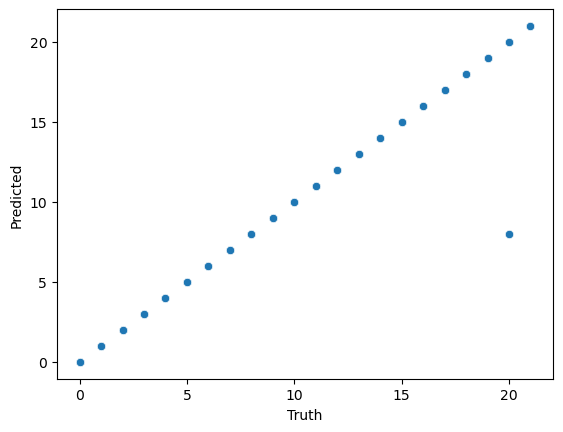

<Figure size 1000x800 with 0 Axes>

In [30]:
sns.scatterplot(x="actual",y='predicted',data=ap)
plt.ylabel('Predicted')
plt.xlabel('Truth')
plt.figure(figsize=(10,8))

In [31]:
confusion_matrix(y_train,cross_val_predict(gnb,x_train,y_train,cv=3))

array([[77,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 79,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 80,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 73,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 83,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 83,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 86,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 76,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 80,  0,  0,

In [33]:
print(classification_report(y_train,cross_val_predict(gnb,x_train,y_train,cv=3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        80
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        83
           6       0.99      1.00      0.99        83
           7       1.00      1.00      1.00        86
           8       0.93      0.99      0.96        77
           9       1.00      1.00      1.00        80
          10       0.99      1.00      0.99        89
          11       1.00      0.99      0.99        79
          12       1.00      1.00      1.00        81
          13       1.00      0.99      0.99        76
          14       1.00      1.00      1.00        81
          15       1.00      1.00      1.00        83
          16       1.00      1.00      1.00        86
          17       1.00    

In [36]:
p,r,t=precision_recall_curve(y_train,cross_val_predict(gnb,x_train,y_train,cv=3))

ValueError: multiclass format is not supported

In [43]:
p=precision_score(y_test,gnb.predict(x_test),average='macro')
r=recall_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3),average='macro')
pr=pd.DataFrame(data={'Precision':p,'Recall':r},index=[0])

In [45]:
pr

,Precision,Recall
0,0.996364,0.994869


<AxesSubplot:xlabel='Precision', ylabel='Recall'>

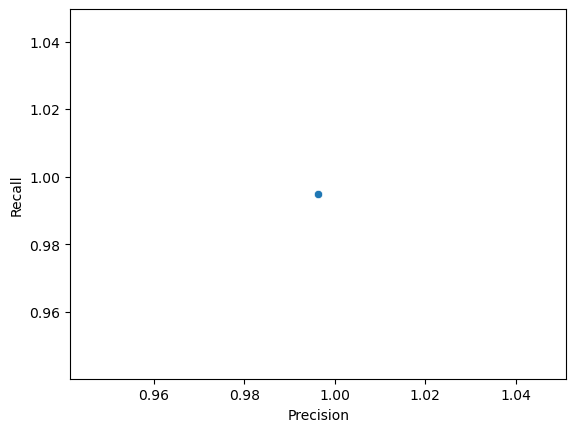

In [44]:
sns.scatterplot(x='Precision',y='Recall',data=pr)

In [40]:
c[c['crop_num']==7]

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,grapes,7
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,grapes,7
1202,22,123,205,32.445778,83.885049,5.896343,68.739325,grapes,7
1203,36,125,196,37.465668,80.659687,6.155261,66.838723,grapes,7
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,grapes,7
...,...,...,...,...,...,...,...,...,...
1295,23,138,200,9.851243,80.226317,5.965379,68.428024,grapes,7
1296,40,143,201,24.972561,82.728287,6.476758,66.700163,grapes,7
1297,6,142,202,27.237083,82.945733,6.224543,70.425089,grapes,7
1298,37,124,195,18.706791,83.479529,6.209928,66.596449,grapes,7


In [41]:
c[c['crop_num']==gnb.predict([[40,59,23,36.891637,62.731782,5.269085,163.726655]]).tolist()[0]]['label'].unique().tolist()[0]

C:\Users\spard\DEMO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


'pigeonpeas'

In [34]:
ap=pd.DataFrame(data={'actual':y_test,'predicted':gnb.predict(x_test)})
ap

,actual,predicted
1451,15,15
1334,21,21
1761,17,17
1735,17,17
1576,0,0
...,...,...
59,20,20
71,20,20
1908,6,6
1958,6,6


<AxesSubplot:xlabel='predicted', ylabel='actual'>

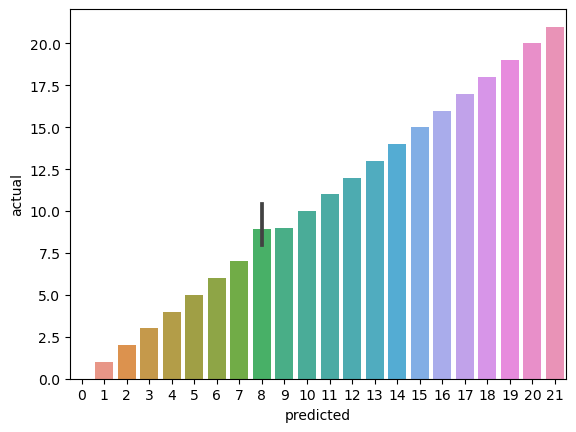

In [35]:
sns.barplot(x=ap.predicted,y=ap.actual)

In [37]:
import pickle
pickle.dump(gnb,open('gnb_model.pkl','wb'))


In [39]:
pickle.dump(c.to_dict(),open('crop_data.pkl','wb'))

In [42]:
f

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type,...,organic_matter,irrigation_frequency,crop_density,pest_pressure,fertilizer_usage,growth_stage,urban_area_proximity,water_source_type,frost_risk,water_usage_efficiency
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2,...,3.121395,4,11.743910,57.607308,188.194958,1,2.719614,3,95.649985,1.193293
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3,...,2.142021,4,16.797101,74.736879,70.963629,1,4.714427,2,77.265694,1.752672
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2,...,1.474974,1,12.654395,1.034478,191.976077,1,30.431736,2,18.192168,3.035541
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3,...,8.393907,1,10.864360,24.091888,55.761388,3,10.861071,3,82.818720,1.273341
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2,...,5.202285,3,13.852910,38.811481,185.259702,2,47.190777,3,25.466499,2.578671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,1,...,4.720355,5,18.597260,87.431199,185.833381,3,31.415618,1,77.719639,4.111619
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,3,...,4.141148,6,15.417979,36.958354,198.541021,2,18.797510,3,22.336839,4.190796
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,3,...,1.599614,5,12.956675,79.678658,86.724381,2,38.805888,3,41.782729,2.447010
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,2,...,8.934077,6,16.868131,31.007156,72.191421,2,8.395498,3,49.619791,4.119388


In [43]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   N                       2200 non-null   int64  
 1   P                       2200 non-null   int64  
 2   K                       2200 non-null   int64  
 3   temperature             2200 non-null   float64
 4   humidity                2200 non-null   float64
 5   ph                      2200 non-null   float64
 6   rainfall                2200 non-null   float64
 7   label                   2200 non-null   object 
 8   soil_moisture           2200 non-null   float64
 9   soil_type               2200 non-null   int64  
 10  sunlight_exposure       2200 non-null   float64
 11  wind_speed              2200 non-null   float64
 12  co2_concentration       2200 non-null   float64
 13  organic_matter          2200 non-null   float64
 14  irrigation_frequency    2200 non-null   

In [32]:
npk=f.iloc[:,:10]

In [34]:
npk

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,3
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,2


In [38]:
npk

,N,P,K,temperature,humidity,ph,rainfall,label,soil_moisture,soil_type
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.446064,2
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,12.851183,3
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.363913,2
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,26.207732,3
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,28.236236,2
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,10.697757,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,12.203830,3
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,28.989176,3
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,13.642305,2


In [39]:
npk_new=npk.drop(columns=['label'])

In [171]:
x=npk_new[['temperature','humidity','ph','rainfall','soil_moisture','soil_type']]
y=npk_new['K']

In [156]:
x

,temperature,humidity,ph,rainfall,soil_moisture,soil_type
0,20.879744,82.002744,6.502985,202.935536,29.446064,2
1,21.770462,80.319644,7.038096,226.655537,12.851183,3
2,23.004459,82.320763,7.840207,263.964248,29.363913,2
3,26.491096,80.158363,6.980401,242.864034,26.207732,3
4,20.130175,81.604873,7.628473,262.717340,28.236236,2
...,...,...,...,...,...,...
2195,26.774637,66.413269,6.780064,177.774507,10.697757,1
2196,27.417112,56.636362,6.086922,127.924610,12.203830,3
2197,24.131797,67.225123,6.362608,173.322839,28.989176,3
2198,26.272418,52.127394,6.758793,127.175293,13.642305,2


In [62]:
def soil_name(s):
    if s==1:
        return 'Sandy'
    elif s==2:
        return 'Loamy'
    else:
        return 'Clay'

In [63]:
npk['soil_type_name']=npk['soil_type'].apply(soil_name)

In [84]:
y.unique()

array([2, 3, 1], dtype=int64)

In [157]:
from sklearn.linear_model import LinearRegression, SGDRegressor, PassiveAggressiveRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=123)

In [109]:
lr=LinearRegression()
sgd=SGDRegressor()
svr=SVR(epsilon=.2)
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors=3)
xgr=XGBRegressor()
par=PassiveAggressiveRegressor(max_iter=100)
abr=AdaBoostRegressor( n_estimators=100)
gbr=GradientBoostingRegressor()
br=BaggingRegressor(n_estimators=10)

In [173]:
lr.fit(x_train,y_train)
sgd.fit(x_train,y_train)
svr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
knr.fit(x_train,y_train)
xgr.fit(x_train,y_train)
par.fit(x_train,y_train)
abr.fit(x_train,y_train)
gbr.fit(x_train,y_train)
br.fit(x_train,y_train)

BaggingRegressor()

In [174]:
a=[
    lr.score(x_test,y_test),
   sgd.score(x_test,y_test),
   svr.score(x_test,y_test),
   dtr.score(x_test,y_test),
   rfr.score(x_test,y_test),
   knr.score(x_test,y_test),
   xgr.score(x_test,y_test),
    par.score(x_test,y_test),
   abr.score(x_test,y_test),
   gbr.score(x_test,y_test),
   br.score(x_test,y_test),
]


n=['LinearRegression','SGDRegressor','SVR','DecisionTreeRegressor','RandomForestRegressor',
   'KNeighborsRegressor','XGRegressor','PassiveAggressiveRegressor'
   ,'AdaboostRegressor','GradientBoostingRegressor','BaggingRegressor']
# acc_table_N=pd.DataFrame(data={'Names':n,'Accuracy':a})

In [161]:
acc_table_N=pd.DataFrame(data={'Names':n,'Accuracy':a})

In [168]:
acc_table_P=pd.DataFrame(data={'Names':n,'Accuracy':a})

In [175]:
acc_table_K=pd.DataFrame(data={'Names':n,'Accuracy':a})

In [162]:
acc_table_N.sort_values('Accuracy',ascending=False)

,Names,Accuracy
4,RandomForestRegressor,8.412293e-01
10,BaggingRegressor,8.372762e-01
6,XGRegressor,7.877976e-01
3,DecisionTreeRegressor,7.246798e-01
9,GradientBoostingRegressor,7.162174e-01
5,KNeighborsRegressor,6.622454e-01
8,AdaboostRegressor,5.835450e-01
2,SVR,3.016703e-02
0,LinearRegression,2.623499e-02
7,PassiveAggressiveRegressor,-1.914132e+00


In [169]:
acc_table_P.sort_values('Accuracy',ascending=False)

,Names,Accuracy
4,RandomForestRegressor,8.294324e-01
6,XGRegressor,8.094640e-01
10,BaggingRegressor,8.082433e-01
9,GradientBoostingRegressor,6.838833e-01
3,DecisionTreeRegressor,5.959308e-01
8,AdaboostRegressor,4.950765e-01
5,KNeighborsRegressor,4.764039e-01
0,LinearRegression,3.737673e-02
2,SVR,1.134136e-02
7,PassiveAggressiveRegressor,-1.220558e+01


In [176]:
acc_table_K.sort_values('Accuracy',ascending=False)

,Names,Accuracy
4,RandomForestRegressor,8.724601e-01
10,BaggingRegressor,8.464843e-01
6,XGRegressor,8.367663e-01
9,GradientBoostingRegressor,7.792706e-01
3,DecisionTreeRegressor,7.508396e-01
8,AdaboostRegressor,6.050905e-01
5,KNeighborsRegressor,5.540435e-01
0,LinearRegression,1.132184e-01
7,PassiveAggressiveRegressor,-3.608433e-02
2,SVR,-4.318314e-02


In [177]:
pickle.dump(rfr,open('rfr_k_model.pkl','wb'))

In [178]:
npk_new

,N,P,K,temperature,humidity,ph,rainfall,soil_moisture,soil_type,soil_type_name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,29.446064,2,Loamy
1,85,58,41,21.770462,80.319644,7.038096,226.655537,12.851183,3,Clay
2,60,55,44,23.004459,82.320763,7.840207,263.964248,29.363913,2,Loamy
3,74,35,40,26.491096,80.158363,6.980401,242.864034,26.207732,3,Clay
4,78,42,42,20.130175,81.604873,7.628473,262.717340,28.236236,2,Loamy
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,10.697757,1,Sandy
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,12.203830,3,Clay
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,28.989176,3,Clay
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,13.642305,2,Loamy


In [181]:
rfr.predict([[27.41,56.63,6.08,127.92,12.20,3]]).tolist()[0]

C:\Users\spard\DEMO\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


27.06

In [183]:
pickle.dump(npk_new.to_dict(),open('npk_new_data.pkl','wb'))

In [7]:
c.to_csv('C:/Users/spard/OneDrive/Documents/soham/Crop_Recommendation_dataset.csv')

In [107]:
precision_score(y_test,lr.predict(x_test),average='macro')

C:\Users\spard\DEMO\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0024912313047906268

In [78]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import precision_score, r2_score, recall_score,f1_score
from sklearn.model_selection import cross_val_predict,cross_val_score

In [79]:
lr=LogisticRegression()
sgc=SGDClassifier()
svc=SVC()
etc=ExtraTreeClassifier()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knc=KNeighborsClassifier(n_neighbors=3)
xgc=XGBClassifier()
pac=PassiveAggressiveClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [99]:
lr.fit(x_train,y_train)
sgc.fit(x_train,y_train)
svc.fit(x_train,y_train)
etc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
rfc.fit(x_train,y_train)
knc.fit(x_train,y_train)
# xgc.fit(x_train,y_train)
pac.fit(x_train,y_train)
bc.fit(x_train,y_train)
gbc.fit(x_train,y_train)
abc.fit(x_train,y_train)
gnb.fit(x_train,y_train)
mnb.fit(x_train,y_train)
bnb.fit(x_train,y_train)

C:\Users\spard\DEMO\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BernoulliNB()

In [100]:
a=[
    gnb.score(x_test,y_test),
   mnb.score(x_test,y_test),
   bnb.score(x_test,y_test),
   dtc.score(x_test,y_test),
   svc.score(x_test,y_test),
   etc.score(x_test,y_test),
   lr.score(x_test,y_test),
   sgc.score(x_test,y_test),
   pac.score(x_test,y_test),
   rfc.score(x_test,y_test),
   knc.score(x_test,y_test),
  abc.score(x_test,y_test),
   gbc.score(x_test,y_test),
   bc.score(x_test,y_test),
#    xgc.score(x_test,y_test)
]
p=[
    precision_score(y_test,gnb.predict(x_test),average='macro'),
    precision_score(y_test,mnb.predict(x_test),average='macro'),
    precision_score(y_test,bnb.predict(x_test),average='macro'),
    precision_score(y_test,dtc.predict(x_test),average='macro'),
    precision_score(y_test,svc.predict(x_test),average='macro'),
     precision_score(y_test,etc.predict(x_test),average='macro'),
    precision_score(y_test,lr.predict(x_test),average='macro'),
    precision_score(y_test,sgc.predict(x_test),average='macro'),
    precision_score(y_test,pac.predict(x_test),average='macro'),
    precision_score(y_test,rfc.predict(x_test),average='macro'),
    precision_score(y_test,knc.predict(x_test),average='macro'),
    precision_score(y_test,abc.predict(x_test),average='macro'),
     precision_score(y_test,gbc.predict(x_test),average='macro'),
    precision_score(y_test,bc.predict(x_test),average='macro'),
#     precision_score(y_test,xgc.predict(x_test),average='macro')
]
r=[
    recall_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(mnb,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(bnb,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(dtc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(svc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(etc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(lr,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(sgc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(pac,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(rfc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(knc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(abc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(gbc,x_train,y_train,cv=3),average='macro'),
    recall_score(y_train,cross_val_predict(bc,x_train,y_train,cv=3),average='macro')
]
f1=[
    f1_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(mnb,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(bnb,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(dtc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(svc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(etc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(lr,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(sgc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(pac,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(rfc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(knc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(abc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(gbc,x_train,y_train,cv=3),average='macro'),
    f1_score(y_train,cross_val_predict(bc,x_train,y_train,cv=3),average='macro')
]
r2=[
    r2_score(y_train,cross_val_predict(gnb,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(mnb,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(bnb,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(dtc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(svc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(etc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(lr,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(sgc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(pac,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(rfc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(knc,x_train,y_train,cv=3)),
    r2_score(y_train,cross_val_predict(abc,x_train,y_train,cv=3)),
     r2_score(y_train,cross_val_predict(gbc,x_train,y_train,cv=3)),
     r2_score(y_train,cross_val_predict(bc,x_train,y_train,cv=3)),
]
n=['GaussianNB','MultinomialNB','BernoulliNB','DecisionTreeClassifier',
   'SVC','ExtraTreeClassifier','LogisticRegression','SGDClassifier',
   'PassiveAggressiveClassifier','RandomForestClassifier',
   'KNeighborsClassifier','AdaboostClassifier','GradientBoostingClassifier','BaggingClassifier']
kss=pd.DataFrame(data={'Names':n,'Accuracy':a,'Precision':p,'Recall':r,'F1_Score':f1,'R2_Score':r2})

C:\Users\spard\DEMO\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\spard\DEMO\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\spard\DEMO\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels wit

C:\Users\spard\DEMO\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\spard\DEMO\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

In [101]:
kss.sort_values('Accuracy',ascending=False)


,Names,Accuracy,Precision,Recall,F1_Score,R2_Score
4,SVC,0.370455,0.352430,0.324753,0.305924,-6.518400e-01
5,ExtraTreeClassifier,0.368182,0.368897,0.339206,0.330360,-1.008555e+00
2,BernoulliNB,0.359091,0.119697,0.333333,0.167588,-4.860411e-07
9,RandomForestClassifier,0.359091,0.357036,0.305132,0.315500,-1.000001e+00
0,GaussianNB,0.354545,0.323357,0.336768,0.325747,-8.964937e-01
10,KNeighborsClassifier,0.354545,0.351960,0.353212,0.344916,-9.905912e-01
13,BaggingClassifier,0.345455,0.344742,0.323827,0.316673,-1.033363e+00
6,LogisticRegression,0.338636,0.318856,0.345729,0.335938,-8.802404e-01
3,DecisionTreeClassifier,0.334091,0.335114,0.340404,0.337884,-9.657837e-01
11,AdaboostClassifier,0.315909,0.315253,0.344217,0.344370,-1.047050e+00
